In [ ]:
# ## 📊 Silhouette Score & WCSS: Cluster Evaluation

# After applying PCA to reduce feature dimensions, we used two important metrics to evaluate the quality of the clustering:

# ---

# ### 1. **Silhouette Score**
# - The **Silhouette Score** measures how well each data point fits within its cluster.
# - It ranges from **-1 to 1**:
#   - **+1** means the sample is far away from neighboring clusters (ideal).
#   - **0** means the sample is on the border between clusters.
#   - **-1** means the sample may be in the wrong cluster.
# - A **higher Silhouette Score** indicates better-defined clusters.

# In our analysis, the score **peaked around k = 5**, suggesting that this is the most natural number of clusters for our dataset.

# ---

# ### 2. **WCSS (Within-Cluster Sum of Squares)**
# - WCSS is the total distance between each point and its cluster centroid.
# - Lower WCSS indicates tighter clusters, but:
#   - WCSS **always decreases as k increases**, so we use the **Elbow Method** to find the optimal value.
# - The **"elbow point"** on the graph shows where adding more clusters does not significantly improve clustering.

# In our case, the elbow also appears around **k = 5**, which supports the choice made based on the Silhouette Score.

# ---

# ### ✅ Conclusion
# Both metrics suggest that **k = 5** provides a good balance between compact and well-separated clusters.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset 
url = "https://raw.githubusercontent.com/AljawharahAlotaibi/swe485/main/Dataset/updated_cleaned_games.xls"
df = pd.read_csv(url)
df['genres'] = df['genres_y'].astype(str).apply(lambda x: x.split(', '))
df['categories'] = df['categories_y'].astype(str).apply(lambda x: x.split(', '))

# Encode genres and categories
mlb_genre = MultiLabelBinarizer()
mlb_category = MultiLabelBinarizer()

genre_encoded = mlb_genre.fit_transform(df['genres'])
category_encoded = mlb_category.fit_transform(df['categories'])

df_genre = pd.DataFrame(genre_encoded, columns=mlb_genre.classes_)
df_category = pd.DataFrame(category_encoded, columns=mlb_category.classes_)

# TF-IDF on game descriptions
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
desc_tfidf = tfidf.fit_transform(df['detailed_description'].fillna(""))
df_desc = pd.DataFrame(desc_tfidf.toarray(), columns=tfidf.get_feature_names_out())# Combine all features
df_features = pd.concat([df_genre, df_category, df_desc], axis=1)

ce made based on the Silhouette Score.

---

### ✅ Conclusion
Both metrics suggest that **k = 5** provides a good balance between compact and well-separated clusters.

ce made based on the Silhouette Score.

---

### ✅ Conclusion
Both metrics suggest that **k = 5** provides a good balance between compact and well-separated clusters.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)  # keep 90% of variance
df_pca = pca.fit_transform(df_features)

In [ ]:
#KMeans clustering to the reduced features
k = 5  
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)

# Add cluster labels back to the original DataFrame
df['cluster'] = cluster_labels

K = 2, Silhouette Score = 0.094
K = 3, Silhouette Score = 0.070
K = 4, Silhouette Score = 0.064
K = 5, Silhouette Score = 0.081
K = 6, Silhouette Score = 0.073
K = 7, Silhouette Score = 0.078
K = 8, Silhouette Score = 0.073
K = 9, Silhouette Score = 0.080
K = 10, Silhouette Score = 0.089


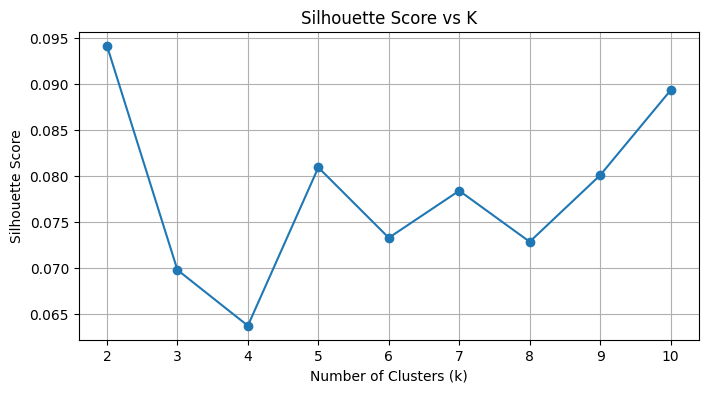

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
k_values = range(2, 11)  # جرب من 2 إلى 10 مجموعات

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels)
    silhouette_scores.append(score)
    print(f"K = {k}, Silhouette Score = {score:.3f}")

# رسم بياني لسهولة المقارنة
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
# Calculate silhouette score to evaluate clustering performance
sil_score = silhouette_score(df_pca, cluster_labels)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.081


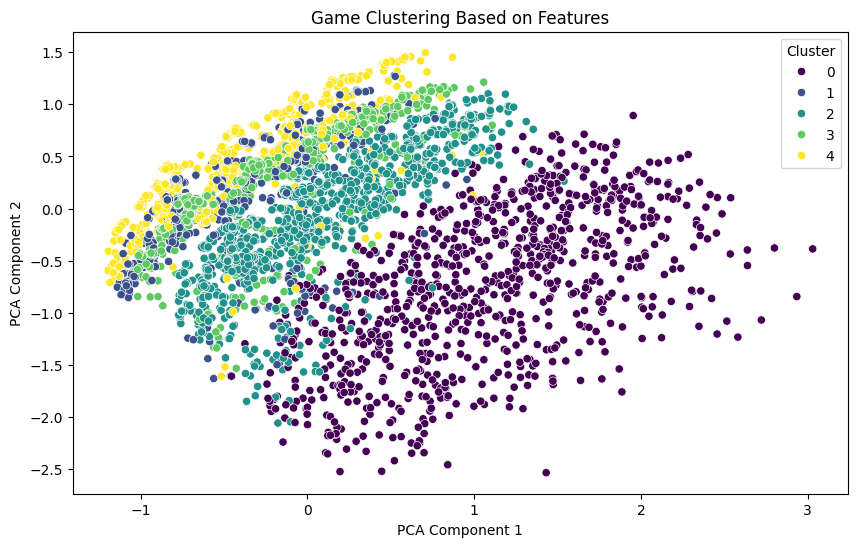

In [ ]:
# Visualizing clusters using the first 2 PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=cluster_labels, palette="viridis")
plt.title("Game Clustering Based on Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [ ]:
def recommend_from_cluster(game_name, df, top_n=5):
    # Check if the game exists
    if game_name not in df['name'].values:
        print("Game not found.")
        return None

    # Get the cluster of the selected game
    cluster = df[df['name'] == game_name]['cluster'].values[0]

    # Get all games in the same cluster
    cluster_games = df[df['cluster'] == cluster]

    # Exclude the selected game itself
    recommendations = cluster_games[cluster_games['name'] != game_name]

    # Return top_n games with their relevant info
    return recommendations[['name', 'genres', 'categories', 'detailed_description', 'cluster']].head(top_n)

In [ ]:
recommend_from_cluster("Vice City Race", df)

,name,genres,categories,detailed_description,cluster
4,Stacking,"[['Adventure', 'Indie']]","[['Single-player', 'Partial Controller Support...","From Tim Schafer’s Double Fine Productions, ex...",4
12,"The Overlord Isn't Another Isekai Protagonist,...","[['Adventure', 'Casual', 'Indie', 'Simulation'...","[['Single-player', 'Family Sharing']]","Visual novel, Dating simulator, Hidden Object ...",4
15,Connected Hearts: The Musketeers Saga Collecto...,"[['Adventure', 'Casual']]","[['Single-player', 'Family Sharing']]",The kingdom is in danger! Can you stop the rog...,4
32,All Alone,"[['Adventure', 'Indie']]","[['Single-player', 'Family Sharing']]",“All Alone” is a single-player 3D first-person...,4
33,Twelve Minutes,"[['Adventure', 'Indie']]","[['Single-player', 'Steam Achievements', 'Full...",You Might Also Like / / About the Game TWELVE ...,4


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=1.5, min_samples=5)
cluster_labels = dbscan.fit_predict(df_pca)

# Add cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Filter out noise points (-1) for evaluation
mask = cluster_labels != -1
sil_score = silhouette_score(df_pca[mask], cluster_labels[mask])
print(f"Silhouette Score (DBSCAN): {sil_score:.3f}")

Silhouette Score (DBSCAN): -0.034


In [ ]:
for eps_val in [0.5, 1.0, 1.5, 2.0]:
    db = DBSCAN(eps=eps_val, min_samples=5)
    labels = db.fit_predict(df_pca)
    if len(set(labels)) > 1:
        sil = silhouette_score(df_pca[labels != -1], labels[labels != -1])
        print(f"eps = {eps_val} → silhouette = {sil:.3f}")

eps = 0.5 → silhouette = 0.807
eps = 1.0 → silhouette = 0.385
eps = 1.5 → silhouette = -0.034
eps = 2.0 → silhouette = 0.178


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.0, min_samples=5)
cluster_labels = dbscan.fit_predict(df_pca)

df['cluster'] = cluster_labels  # Add cluster labels

In [ ]:
df_clustered = df[df['cluster'] != -1]

In [ ]:
def recommend_from_cluster(game_name, df, top_n=5):
    if game_name not in df['name'].values:
        print("Game not found.")
        return None

    cluster = df[df['name'] == game_name]['cluster'].values[0]
    cluster_games = df[(df['cluster'] == cluster) & (df['name'] != game_name)]

    return cluster_games[['name', 'genres', 'categories', 'detailed_description', 'cluster']].head(top_n)

## Explanation of How Clustering Enhances Recommendation Quality

Clustering techniques, such as **KMeans** and **DBSCAN**, are used in this notebook to group games into distinct clusters based on shared attributes — including genres, categories, and semantic features extracted from their descriptions using TF-IDF.

These clusters act as **latent communities** of similar games. By identifying the cluster to which a selected game belongs, we can recommend other games from the same cluster. This approach assumes that games grouped together share meaningful similarities in content, gameplay style, or user experience.

Using clusters in recommendations offers the following benefits:

- ✅ **Improved Relevance**: Games recommended from the same cluster are more likely to align with the user's interests.
- ⚡ **Efficiency**: Instead of comparing every game to all others, we limit recommendations to a specific, relevant subset.
- 🎯 **Personalization**: Clustering allows us to tailor recommendations without needing prior user interaction or ratings (i.e., content-based recommendations without collaborative filtering).

However, the effectiveness of this approach depends heavily on the quality of the clusters. This is why we evaluated clustering performance using **Silhouette Scores**. For instance, DBSCAN with `eps=0.5` produced a high Silhouette Score (~0.807), indicating well-separated clusters and promising potential for precise recommendations. Conversely, lower or negative scores suggest overlapping or poorly defined clusters, which may reduce recommendation accuracy.

Overall, clustering serves as a foundational step in building more structured, data-driven, and intelligent recommendation systems.
